# Feature Selection
### Tugas Machine Learning Class 
### SIB AI-Hacker Bisa AI Academy

## Soal
* Cari dataset bisa bersumber dari keagle dataset atau UCI dataset atau sumber lainnya
* Terapkan metode seleksi fitur dengan metode filter, wrapper, dan embedded
* Berikan analisis dari ketiga metode tadi

## Dataset
Dataset yang saya gunakan adalah Red Wine Quality yang berasal dari kaggle: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

## Filter Method - Chi Square

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
data = pd.read_csv('winequality-red.csv')
print(data)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [3]:
X = data.iloc[:,0:11]
y = data.iloc[:,-1]

In [4]:
#apply SelectKBest class to extract top 8 best features
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
featureScores = pd.concat([dfcolumns,dfscores], axis=1)
featureScores.columns = ['Features','Score']

In [7]:
featureScores

,Features,Score
0,fixed acidity,11.260652
1,volatile acidity,15.580289
2,citric acid,13.025665
3,residual sugar,4.123295
4,chlorides,0.752426
5,free sulfur dioxide,161.936036
6,total sulfur dioxide,2755.557984
7,density,0.000230
8,pH,0.154655
9,sulphates,4.558488


#### Menampilkan Score yang diurutkan berdasarkan nilai tertinggi hingga terendah

In [8]:
print(featureScores.nlargest(10,'Score'))

                Features        Score
6   total sulfur dioxide  2755.557984
5    free sulfur dioxide   161.936036
10               alcohol    46.429892
1       volatile acidity    15.580289
2            citric acid    13.025665
0          fixed acidity    11.260652
9              sulphates     4.558488
3         residual sugar     4.123295
4              chlorides     0.752426
8                     pH     0.154655


### Visualize with Horizontal bar plot

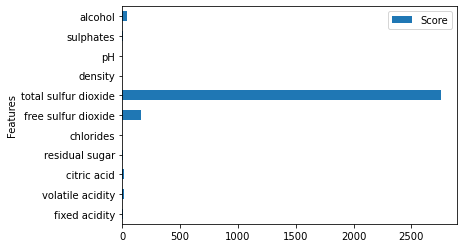

In [9]:
visualize = featureScores.plot.barh(x='Features',y='Score')

### Kesimpulan Filter Method - Chi Square
Dengan menggunakan Chi Square telah diketahui urutan fitur-fitur dari yang terbaik hingga kurang baik. Bila diambil 4 terbaik maka urutan fiturnya adalah:
* total sulfur dioxide
* free sulfur dioxide 
* alcohol
* volatile acidity

## Wrapper Method - RFE

In [10]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=4)
fit = rfe.fit(X,y)

print("Num Features: %s" %(fit.n_features_))
print("Selected Features: %s" %(fit.support_))
print("Feature Ranking: %s" %(fit.ranking_))

dfscores = pd.DataFrame(fit.support_)
dfranking = pd.DataFrame(fit.ranking_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores, dfranking], axis=1)
featureScores.columns=["Attr", "Selected", "Ranking"]
print(featureScores.nlargest(8,'Selected'))

C:\Users\Jeremyas Cornelis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Jeremyas Cornelis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Num Features: 4
Selected Features: [False  True False False False False False  True  True  True False]
Feature Ranking: [5 1 4 6 3 7 8 1 1 1 2]
               Attr  Selected  Ranking
1  volatile acidity      True        1
7           density      True        1
8                pH      True        1
9         sulphates      True        1
0     fixed acidity     False        5
2       citric acid     False        4
3    residual sugar     False        6
4         chlorides     False        3


### Kesimpulan Wrapper Method - RFE
Dengan menggunakan RFE telah diketahui urutan fitur-fitur dari yang terbaik hingga kurang baik. Bila diambil 4 terbaik maka urutan fiturnya adalah:
* volatile acidity
* density  
* pH
* sulphates 

## Wrapper Method - Forward Selection

In [12]:
!pip install mlxtend

In [13]:
data.shape

(1599, 12)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
X.shape, y.shape

((1599, 11), (1599,))

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [17]:
lreg = LinearRegression()
fs = sfs(lreg, k_features=8, forward=True, verbose=2, scoring="neg_mean_squared_error")

In [18]:
fs = fs.fit(X,y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.0s finished

[2022-09-15 17:09:22] Features: 1/8 -- score: -0.5110067285524986[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished

[2022-09-15 17:09:22] Features: 2/8 -- score: -0.4490147383616209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2022-09-15 17:09:22] Features: 3/8 -- score: -0.4448886951259235[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [19]:
feat_names = list(fs.k_feature_names_)
print(feat_names)

['volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']


In [20]:
new_data = data[feat_names]
new_data['quality'] = data['quality']
new_data.head()

<ipython-input-20-4ad144ed1e8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['quality'] = data['quality']


,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.70,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5
1,0.88,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5
2,0.76,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5
3,0.28,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6
4,0.70,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5


### Kesimpulan Wrapper Method - Forward Selection
Dengan menggunakan RFE telah diketahui urutan fitur-fitur dari yang terbaik hingga kurang baik. Bila diambil 4 terbaik maka urutan fiturnya adalah:
* volatile acidity
* residual sugar 
* chlorides
* free sulfur dioxide

## Embedded Method - Decision Tree

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [22]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [23]:
print(model.feature_importances_)

[0.07695585 0.09525079 0.08043101 0.07683322 0.07864061 0.07504071
 0.09909386 0.08558658 0.07571304 0.10402622 0.15242811]


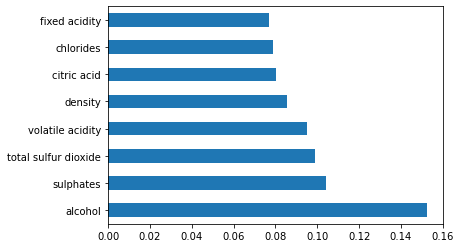

In [24]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

### Kesimpulan Embedded Method - Decision Tree
Dengan menggunakan Decision Tree telah diketahui urutan fitur-fitur dari yang terbaik hingga kurang baik. Bila diambil 4 terbaik maka urutan fiturnya adalah:
* alcohol
* sulphates 
* total sulfur dioxide
* volatile acidity

## Embedded Method - Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X,y)
print(ridge.coef_)

def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X-%s" % x for x in X.columns]
    print(names)
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

print ("Ridge model:", pretty_print_coefs(ridge.coef_))

[ 0.0134762  -1.10606693 -0.19832796  0.00754172 -1.34484932  0.00449295
 -0.00321945 -0.02068421 -0.43768992  0.81780861  0.29833937]
['X-fixed acidity', 'X-volatile acidity', 'X-citric acid', 'X-residual sugar', 'X-chlorides', 'X-free sulfur dioxide', 'X-total sulfur dioxide', 'X-density', 'X-pH', 'X-sulphates', 'X-alcohol']
Ridge model: 0.013 * X-fixed acidity + -1.106 * X-volatile acidity + -0.198 * X-citric acid + 0.008 * X-residual sugar + -1.345 * X-chlorides + 0.004 * X-free sulfur dioxide + -0.003 * X-total sulfur dioxide + -0.021 * X-density + -0.438 * X-pH + 0.818 * X-sulphates + 0.298 * X-alcohol


### Kesimpulan Embedded Method - Ridge Regression
Dengan menggunakan Ridge Regression telah diketahui urutan fitur-fitur dari yang terbaik hingga kurang baik. Bila diambil 4 terbaik maka urutan fiturnya adalah:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar

## Analisis dari Ketiga Metode

Pada materi Feature Selection ini, dalam implementasinya saya menggunakan beberapa teknik dari ketiga metode tersebut:
* Untuk Filter method saya menggunakan Teknik Chi Square
* Untuk Wrapper method saya menggunakan RFE dan Forward Selection
* Untuk Embedded method saya menggunakan Decision Tree dan Ridge Regression

Berikut merupakan rekap dari kesimpulan hasil masing-masing teknik tersebut yang dalam hal ini saya hanya mengambil 4 fitur terbaik dari 8 fitur yang terbaik dari dataset yang saya miliki:

### Filter Method - Chi Square
* total sulfur dioxide
* free sulfur dioxide
* alcohol
* volatile acidity

### Wrapper Method - RFE
* volatile acidity
* density
* pH
* sulphates

### Wrapper Method - Forward Selection
* volatile acidity
* residual sugar
* chlorides
* free sulfur dioxide

### Embedded Method - Decision Tree
* alcohol
* sulphates
* total sulfur dioxide
* volatile acidity

### Embedded Method - Ridge Regression
* fixed acidity
* volatile acidity
* citric acid
* residual sugar

## Opini 
Dapat dilihat bahwa dengan metode dan teknik yang beragam akan muncul pula hasil yang beragam namun perbedaan juga tidak terlalu jauh, terbukti ada beberapa fitur seperti volatile acidity yang selalu muncul sebagai 4 fitur terbaik yang telah terseleksi dari beberapa metode dan teknik tersebut. Apabila hal ini lanjut ke modelling, kemungkinan saya akan memilih 8 fitur dari 12 fitur yang tersedia untuk mengurangi fitur-fitur yang tidak perlu. Adapun 8 fitur yang kemungkinan saya pilih adalah:
* volatile acidity
* alcohol
* total sulfur dioxide
* free sulfur dioxide
* density
* pH
* sulphates
* residual sugar

Namun tentunya dalam proses membuat sistem cerdas sangat jarang untuk menerapkan semua metode dan teknik Feature Selection. Dalam kenyataannya kemungkinan saya akan menggunakan Filter Method yaitu teknik Chi Square karena saya cukup memahami cara perhitungan manualnya sehingga bila diimplementasikan ke kode akan cukup mudah bagi saya untuk memahami dinamika datanya.